In [1]:
import joblib
import numpy as np
import librosa
import matplotlib.pyplot as plt 
import glob
import os
import pandas as pd

# Getting the log-mel spectrogram based on the raw VLA data of 1 channel

In [2]:
raw_path = r'../../data/swellex_real_vla_ts_data/channel_1.pkl'

with open(raw_path, 'rb') as f:
    raw_data = joblib.load(f)

In [3]:
# Every 1500 samples is 1 second
first_second_raw_data = raw_data[:1500]
raw_data_mel_spectrogram = librosa.feature.melspectrogram(
    y=first_second_raw_data,
    sr=1500,
    n_fft=1024,
    hop_length=20,
    win_length=2*20,
    window='hann',
)
raw_data_db_mel_spectrogram = librosa.power_to_db(raw_data_mel_spectrogram)

In [65]:
display(raw_data_mel_spectrogram.shape)
display(raw_data_mel_spectrogram[0].shape)
display(raw_data_mel_spectrogram[0]

(128, 76)

()

[Text(0.5, 1.0, 'Log Mel-frequency Spectrogram of 1 spectrogram on First Channel')]

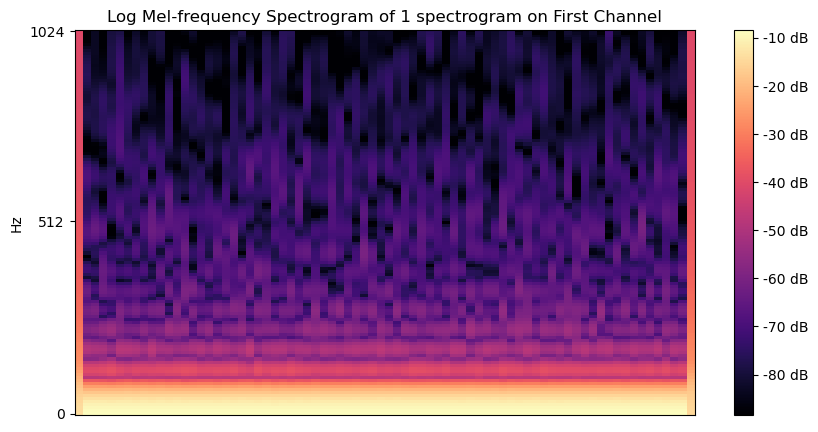

In [4]:
raw_data_fig, raw_data_ax = plt.subplots()
raw_data_fig.set_size_inches(10, 5)
raw_data_img = librosa.display.specshow(
    raw_data_db_mel_spectrogram, 
    x_axis=None,
    y_axis='mel', 
    sr=1500,
    fmax=1024, 
    ax=raw_data_ax
)
raw_data_fig.colorbar(raw_data_img, ax=raw_data_ax, format='%+2.0f dB')
raw_data_ax.set(title='Log Mel-frequency Spectrogram of 1 spectrogram on First Channel')

# Getting the log-mel spectrogram based on real VLA using Quoc's preprocessor

In [5]:
real_mel_spectrogram_path = r'/mnt/active_storage/Joe/preprocessed_data/realvla_1/swellex-6folds-real-vla.pkl'

with open(real_mel_spectrogram_path, 'rb') as f:
    real_mel_spectrogram_data = joblib.load(f)

In [6]:
real_mel_spectrogram_data_fold_0 = pd.DataFrame(real_mel_spectrogram_data[0], columns=['name', 'target', 'waveform'])

In [53]:
#display(real_mel_spectrogram_data_fold_0)
#display(real_mel_spectrogram_data_fold_0['waveform'])
#display(real_mel_spectrogram_data_fold_0['waveform'][0])
#display(real_mel_spectrogram_data_fold_0['waveform'].shape)
display(real_mel_spectrogram_data_fold_0['waveform'][0].shape)
display(real_mel_spectrogram_data_fold_0['waveform'][0][0].shape)
display(real_mel_spectrogram_data_fold_0['waveform'][0][1].shape)
display(real_mel_spectrogram_data_fold_0['waveform'][0][2].shape)

(75, 14784)

(14784,)

(14784,)

(14784,)

In [74]:
print(len(real_mel_spectrogram_data_fold_0['waveform'][0][0]))

14784


In [88]:
#spectrogram_only_data = np.zeros(len(real_mel_spectrogram_data_fold_0['waveform'][0][0]))
#spectrogram_only_data = real_mel_spectrogram_data_fold_0['waveform'][0][0][:1344]

spectrogram_only_data = np.zeros((750, 75, 1344))
for i, waveform in enumerate(real_mel_spectrogram_data_fold_0['waveform']):
   # print(waveform.shape)
    for j, mel_bin in enumerate(waveform):
       # print(mel_bin[:133])
        spectrogram_only_data[i][j] = mel_bin[:1344]
       # print(mel_bin.shape)
       # input()

# for idx, lst in enumerate(real_mel_spectrogram_data_fold_0['waveform']):
#     print(lst)
#     input()
#     spectrogram_only_data[idx] = (lst[:1344])

In [89]:
display(spectrogram_only_data.shape)

(750, 75, 1344)

[Text(0.5, 1.0, 'Log-mel frequency spectrogram of 1 simuchunk spectrogram with extra db conversion')]

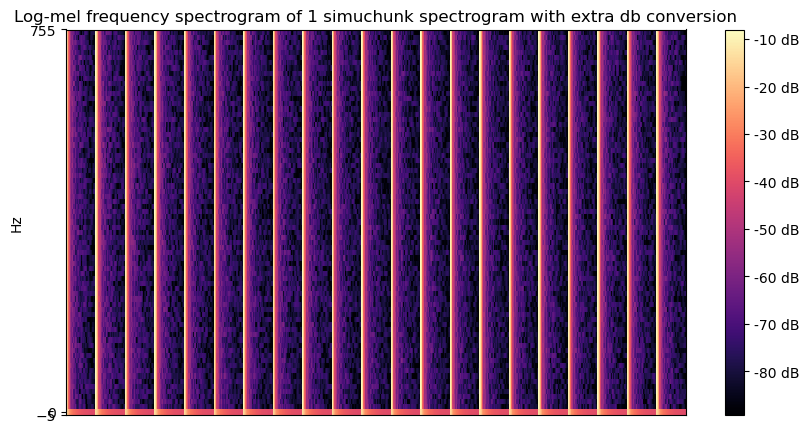

In [90]:
real_fold_0_fig, real_fold_0_ax = plt.subplots()
real_fold_0_fig.set_size_inches(10, 5)
#real_mel_dB = librosa.power_to_db(real_mel_spectrogram_data_fold_0['waveform'][40], ref=np.max)
real_fold_0_img = librosa.display.specshow(
    spectrogram_only_data[0],
    x_axis=None,
    y_axis='mel', 
    sr=1500,
    fmax=750, 
    ax=real_fold_0_ax
)
real_fold_0_fig.colorbar(real_fold_0_img, ax=real_fold_0_ax, format='%+2.0f dB')
real_fold_0_ax.set(title='Log-mel frequency spectrogram of 1 simuchunk spectrogram with extra db conversion')

[Text(0.5, 1.0, 'Log-mel frequency spectrogram of 1 real spectrogram without extra db conversion')]

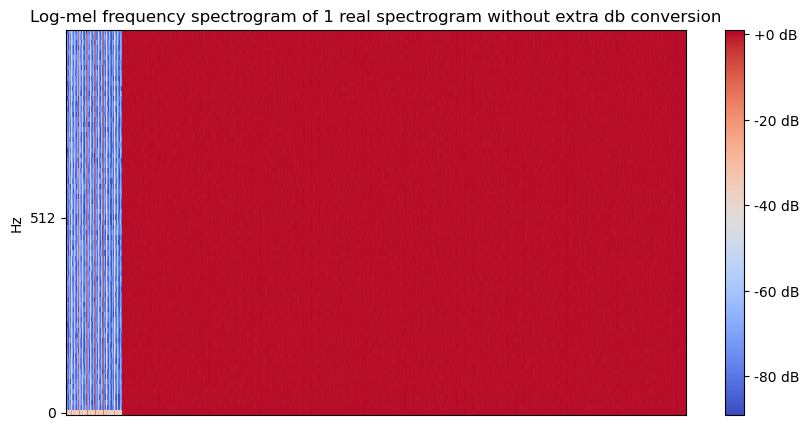

In [8]:
real_fold_0_fig, real_fold_0_ax = plt.subplots()
real_fold_0_fig.set_size_inches(10, 5)
real_fold_0_img = librosa.display.specshow(
    real_mel_spectrogram_data_fold_0['waveform'][0],
    x_axis=None,
    y_axis='mel', 
    sr=1500,
    fmax=1000, 
    ax=real_fold_0_ax
)
real_fold_0_fig.colorbar(real_fold_0_img, ax=real_fold_0_ax, format='%+2.0f dB')
real_fold_0_ax.set(title='Log-mel frequency spectrogram of 1 real spectrogram without extra db conversion')

# Getting the log-mel spectrogram based on 1 spectrogram of simuchunk data using Quoc's preprocessor

In [9]:
simuchunk_mel_spectrogram_path = r'/mnt/active_storage/Joe/preprocessed_data/simuchunk_1/swellex-6folds-simuchunk.pkl'

with open(simuchunk_mel_spectrogram_path, 'rb') as f:
    simuchunk_mel_spectrogram_data = joblib.load(f)

KeyboardInterrupt: 

In [ ]:
simuchunk_mel_spectrogram_data_fold_0 = pd.DataFrame(simuchunk_mel_spectrogram_data[0], columns=['name', 'target', 'waveform'])

In [ ]:
simuchunk_fold_0_fig, simuchunk_fold_0_ax = plt.subplots()
simuchunk_fold_0_fig.set_size_inches(10, 5)
simuchunk_dB = librosa.power_to_db(simuchunk_mel_spectrogram_data_fold_0['waveform'][0], ref=np.max)
simuchunk_fold_0_img = librosa.display.specshow(
    simuchunk_dB,
    x_axis=None,
    y_axis='mel', 
    sr=1500,
    fmax=1000, 
    ax=simuchunk_fold_0_ax
)
simuchunk_fold_0_fig.colorbar(simuchunk_fold_0_img, ax=simuchunk_fold_0_ax, format='%+2.0f dB')
simuchunk_fold_0_ax.set(title='Log-mel frequency spectrogram of 1 simuchunk spectrogram with extra db conversion')

In [ ]:
simuchunk_fold_0_fig, simuchunk_fold_0_ax = plt.subplots()
simuchunk_fold_0_fig.set_size_inches(10, 5)
simuchunk_fold_0_img = librosa.display.specshow(
    simuchunk_mel_spectrogram_data_fold_0['waveform'][0], # Viewing the first second
    x_axis=None,
    y_axis='mel', 
    sr=1500,
    fmax=1000, 
    ax=simuchunk_fold_0_ax
)
simuchunk_fold_0_fig.colorbar(simuchunk_fold_0_img, ax=simuchunk_fold_0_ax, format='%+2.0f dB')
simuchunk_fold_0_ax.set(title='Log-mel frequency spectrogram of 1 simuchunk spectrogram without extra db conversion')

# Getting the log-mel spectrogram based on 1 simuchunk spectrogram without Quoc's preprocessor using all channels

In [ ]:
raw_simu_path = r'../../data/simulated_chunked_time_series_data/features/'

simu_channels = []
for file in glob.glob(raw_simu_path + r'channel_*.pkl'):
    print(f'Opening channel {file}')
    with open(file, 'rb') as f:
        raw_simu_data = joblib.load(f)
        simu_channels.append(raw_simu_data)

In [ ]:
combined_simu_channels = np.zeros((len(simu_channels[0]), len(simu_channels[0][0])))

for channel_number, channel in enumerate(simu_channels):
    print(f'Processing channel {channel_number+1}')
    for g, spectrogram in enumerate(channel):
        combined_simu_channels[g] = combined_simu_channels[g] + spectrogram

In [ ]:
# Every 1500 samples is 1 second
first_second_combined_simu_channels = combined_simu_channels[0]
combined_simu_channels_mel_spectrogram = librosa.feature.melspectrogram(
    y=first_second_combined_simu_channels,
    sr=1502,
    n_fft=1024,
    hop_length=20,
    win_length=2*20,
    window='hann',
)
combined_simu_channels_db_mel_spectrogram = librosa.power_to_db(combined_simu_channels_mel_spectrogram)

In [ ]:
combined_simu_channels_fig, combined_simu_channels_ax = plt.subplots()
combined_simu_channels_fig.set_size_inches(10, 5)
combined_simu_channels_img = librosa.display.specshow(
    combined_simu_channels_db_mel_spectrogram, 
    x_axis=None,
    y_axis='mel', 
    sr=1500,
    fmax=1024, 
    ax=combined_simu_channels_ax
)
combined_simu_channels_fig.colorbar(combined_simu_channels_img, ax=combined_simu_channels_ax, format='%+2.0f dB')
combined_simu_channels_ax.set(title='DB Mel-frequency Spectrogram of 1 spectrogram with Combined Simu Channels')

# Getting the log-mel spectrogram based on 1 simuchunk spectrogram without Quoc's preprocessor using 1 channel

In [ ]:
channel_1_simu_path = r'../../data/simulated_chunked_time_series_data/features/channel_1.pkl'

with open(channel_1_simu_path, 'rb') as f:
        channel_1_simu_raw_data = joblib.load(f)

In [ ]:
# Every 1500 samples is 1 second
channel_1_simu_first_spectrogram = channel_1_simu_raw_data[0]
channel_1_simu_first_mel_spectrogram = librosa.feature.melspectrogram(
    y=channel_1_simu_first_spectrogram,
    sr=1502,
    n_fft=1024,
    hop_length=20,
    win_length=2*20,
    window='hann',
)
channel_1_simu_db_mel_spectrogram = librosa.power_to_db(channel_1_simu_first_mel_spectrogram)

In [ ]:
channel_1_simu_fig, channel_1_simu_ax = plt.subplots()
channel_1_simu_fig.set_size_inches(10, 5)
channel_1_simu_img = librosa.display.specshow(
    channel_1_simu_db_mel_spectrogram, 
    x_axis=None,
    y_axis='mel', 
    sr=1500,
    fmax=1024, 
    ax=channel_1_simu_ax
)
channel_1_simu_fig.colorbar(channel_1_simu_img, ax=channel_1_simu_ax, format='%+2.0f dB')
channel_1_simu_ax.set(title='DB Mel-frequency Spectrogram of 1 spectrogram with 1 Simu Channels')

# Viewing data from the VCC experiment